# Data Collection and EDA:

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

# Download NLTK resources (if not downloaded)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [67]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Final_Project/fake reviews dataset.csv')

In [ ]:
data

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,CG,I liked nothing about this dress. The only rea...


In [ ]:
data['length'] = data['text_'].apply(len)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
 4   length    40432 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

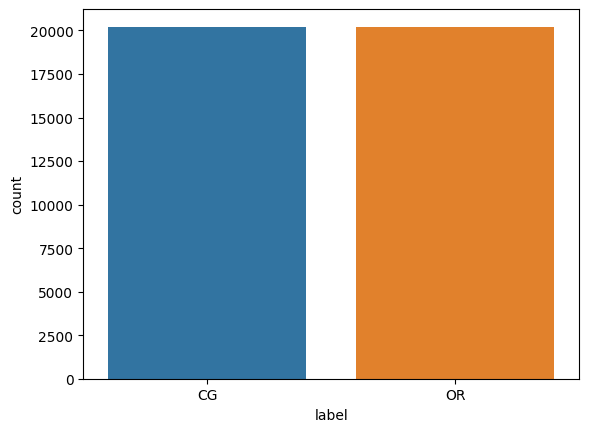

In [ ]:
ax = sn.countplot(x='label',data=data)

In [ ]:
data.dropna(inplace=True)

looking out for most frequent positive words.
analyze positive sentiment in text data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


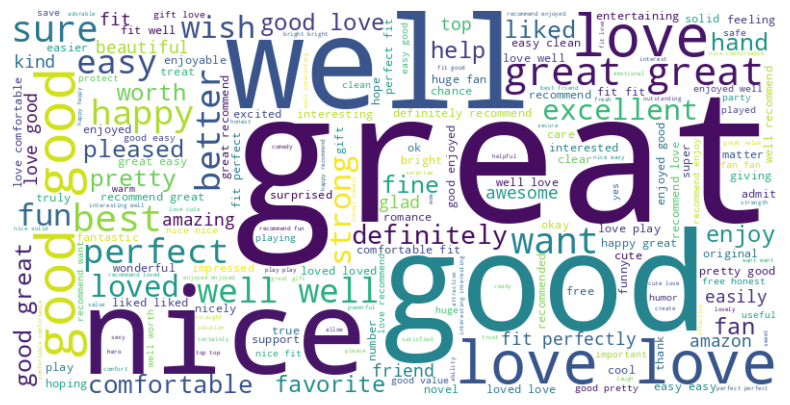

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')  # Download NLTK Vader lexicon

# Sample Pandas Series containing text (replace this with your own data)
text_series = pd.Series(data['text_'])

# NLTK's SentimentIntensityAnalyzer to determine sentiment scores
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each text in the Series
positive_words = []
for text in text_series:
    words = text.split()  # Split text into words
    for word in words:
        score = sia.polarity_scores(word)['compound']
        if score > 0:
            positive_words.append(word)

# Join the positive words to create a string for word cloud generation
positive_text = ' '.join(positive_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


analyzing negative sentiment in text data

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


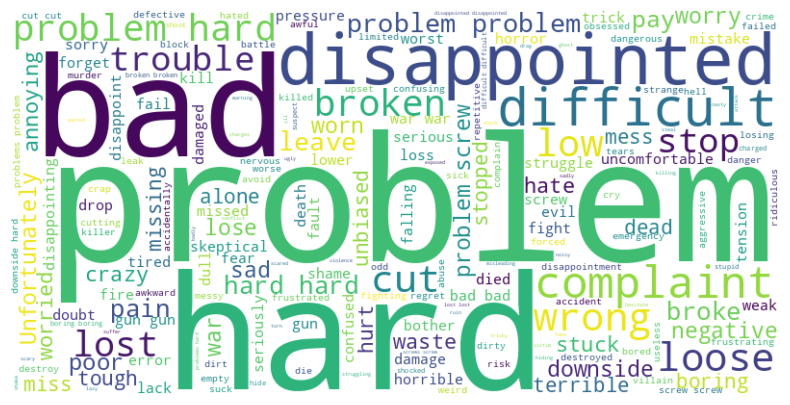

In [53]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')  # Download NLTK Vader lexicon

# Sample Pandas Series containing text (replace this with your own data)
text_series = pd.Series(data['text_'])

# NLTK's SentimentIntensityAnalyzer to determine sentiment scores
sia = SentimentIntensityAnalyzer()

# Analyze sentiment for each text in the Series
negative_words = []
for text in text_series:
    words = text.split()  # Split text into words
    for word in words:
        score = sia.polarity_scores(word)['compound']
        if score < 0:  # Adjusted for negative sentiment
            negative_words.append(word)

# Join the negative words to create a string for word cloud generation
negative_text = ' '.join(negative_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


creating a word cloud from the text categorized as "CG"(fake review)

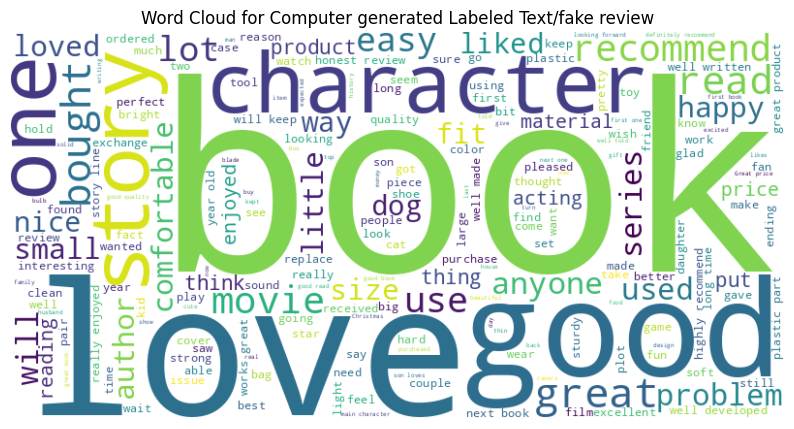

In [69]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter text based on the 'CG' label
cg_text = ' '.join(data[data['label'] == 'CG']['text_'])

# Generate a word cloud from the 'CG' labeled text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cg_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Computer generated Labeled Text/fake review')
plt.show()


creating a word cloud from the original review

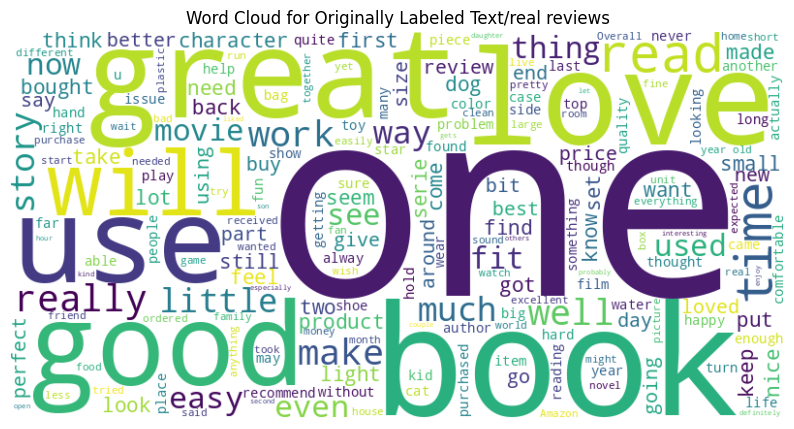

In [70]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Filter text based on the 'CG' label
cg_text = ' '.join(data[data['label'] == 'OR']['text_'])

# Generate a word cloud from the 'CG' labeled text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cg_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Originally Labeled Text/real reviews')
plt.show()

# Data Preprocessing

In [ ]:
#label encoding the categories
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
data['label'] = data['label'].astype('category')

In [ ]:
data['label']

0        0
1        0
2        0
3        0
4        0
        ..
40427    1
40428    0
40429    1
40430    0
40431    1
Name: label, Length: 40432, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
#function to preprocess texts
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags using regular expression
    text = re.sub(r'<.*?>', '', text)

    # Remove non-alphanumeric characters and symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)

    # Tokenization using NLTK
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization using NLTK's WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Remove duplicates and blank spaces
    lemmatized_tokens = list(set(lemmatized_tokens))
    lemmatized_tokens = [token for token in lemmatized_tokens if token.strip() != '']

    # Join tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# Applying the function to a DataFrame column
data['processed_text'] = data['text_'].apply(preprocess_text)


In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(data['processed_text'], data['label'] , test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32345,)
(8087,)
(32345,)
(8087,)


In [ ]:
x_train

16193    stay place furniture easy great little floor f...
28128    loved friend able recommend anyone longer fan ...
38978    im still large fit 36d perfectly wearing probl...
5950     set reading mind would keep review happy order...
20377    deal bag similar quality cant petsmart beat pu...
                               ...                        
33450         could get every playing tried one level game
7114     pretty small fairly side easy typical otherwis...
34204    son broke would recommendi bought minute play ...
14529    loved acting recommend time look forward he si...
39178    finally love shoe foot said tired understand s...
Name: processed_text, Length: 32345, dtype: object

In [ ]:
x_test

19665      great productwe quality happy using dog product
16521    small inexpensive problem come needed screw dr...
3354     cool pointe job grosse fan loud design use pic...
34060    son would recommendi daily play bought love three
13473            would see usa release movie love released
                               ...                        
23827     reading loved glad book definitely read one next
23755                   fun reminded back book go read two
20948    handle still leash scratch brass black like fu...
33383    many buy get lighted great older amazing glass...
23848                        loved began easy book read ol
Name: processed_text, Length: 8087, dtype: object

In [ ]:
num_class = 2     ## Fake News Classifier Contains only two class >> Real - 1 , Fake - 0
y_train.value_counts()

1    16227
0    16118
Name: label, dtype: int64

# Model construction BERT(Pre-trained)

In [ ]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset, RandomSampler
from transformers import AdamW, get_linear_schedule_with_warmup

In [ ]:
!pip install -q transformers

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
#tokenising texts to be fed into the model
SEQ_LEN=30
train_encoded_inputs = tokenizer(data['text_'].tolist(),
                                 add_special_tokens = True,
                                 padding='max_length',
                                 truncation=True,
                                 max_length=SEQ_LEN,
                                 return_token_type_ids=False,
                                 return_tensors = 'tf')

In [ ]:
train_encoded_inputs

{'input_ids': <tf.Tensor: shape=(40432, 30), dtype=int32, numpy=
array([[  101,  2293,  2023, ...,     0,     0,     0],
       [  101,  2293,  2009, ...,     0,     0,     0],
       [  101,  2023, 10005, ...,     0,     0,     0],
       ...,
       [  101,  2017,  2064, ...,  2005,  1017,   102],
       [  101,  1045,  4669, ...,  4906,  6669,   102],
       [  101,  1045,  2147, ...,  2658,  1012,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(40432, 30), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>}

In [ ]:
from transformers import BertTokenizer
from transformers import AutoTokenizer
import tensorflow as tf

train_dataset = tf.data.Dataset.from_tensor_slices((train_encoded_inputs, data['label'].values))

In [ ]:
# formatting the data as required by bert model
def map_bert(inputs, labels):
  inputs = {'input_ids': inputs['input_ids'],
            'attention_mask': inputs['attention_mask']}

  return inputs, labels

In [ ]:
train_dataset = train_dataset.map(map_bert)

In [ ]:
for t in train_dataset.take(2):
  print (t)

({'input_ids': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([  101,  2293,  2023,   999,  2092,  2081,  1010, 23073,  1010,
        1998,  2200,  6625,  1012,  1045,  2293,  2009,   999,  2200,
        3492,   102,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'input_ids': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([  101,  2293,  2009,  1010,  1037,  2307, 12200,  2013,  1996,
        2434,  1012,  1045,  1005,  2310,  2018,  3067,  2005,  1037,
        3232,  1997,  2086,   102,     0,     0,     0,     0,     0,
           0,     0,     0], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(30,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       

In [ ]:

dataset = train_dataset.shuffle(100000).batch(64)
DS_LEN = len(dataset)
DS_LEN

632

In [ ]:
# take 80% for train and 20% for validation
SPLIT = 0.8
train_ds = dataset.take(round(DS_LEN*SPLIT))
val_ds = dataset.skip(round(DS_LEN*SPLIT))

In [ ]:
from transformers import TFAutoModel

bert = TFAutoModel.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# create model architecture
#n_classes = len((train_df.target.unique()))

# Input layers
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=np.int32, name='input_ids' )
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), dtype=np.int32, name = 'attention_mask')

# bert embeddings
embeddings = bert([input_ids, mask])[0]
cls_token = embeddings[:,0,:]

# keras layers
#x = tf.keras.layers.GlobalMaxPool1D()(embeddings)
x = tf.keras.layers.BatchNormalization()(cls_token)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

# output layer
y = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# create the model
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)

In [ ]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 30)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 30)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 30, 76                                       

In [ ]:
# freezing the pretrained bert layer
model.layers[2].trainable = False
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 30)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 30)]                 0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 30, 76                                       

In [ ]:
#learning_rate = 1e-3

optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)
#optimizer = transformers.AdamWeightDecay(learning_rate=5e-4)
loss = tf.keras.losses.BinaryCrossentropy()
metric = tf.keras.metrics.BinaryAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
# train the model
callbacks = [tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.1,min_delta=0.001,monitor='val_loss'),
             tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, monitor='val_loss')]

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 5,
    callbacks = callbacks
)

Epoch 1/5
506/506 [==============================] - 5028s 10s/step - loss: 0.4882 - accuracy: 0.7648 - val_loss: 0.4242 - val_accuracy: 0.8069 - lr: 5.0000e-04
Epoch 2/5
506/506 [==============================] - 4953s 10s/step - loss: 0.4202 - accuracy: 0.8058 - val_loss: 0.3700 - val_accuracy: 0.8295 - lr: 5.0000e-04
Epoch 3/5
506/506 [==============================] - 4754s 9s/step - loss: 0.4027 - accuracy: 0.8169 - val_loss: 0.3503 - val_accuracy: 0.8437 - lr: 5.0000e-04
Epoch 4/5
506/506 [==============================] - 4713s 9s/step - loss: 0.3879 - accuracy: 0.8256 - val_loss: 0.3483 - val_accuracy: 0.8429 - lr: 5.0000e-04
Epoch 5/5
506/506 [==============================] - 4696s 9s/step - loss: 0.3823 - accuracy: 0.8277 - val_loss: 0.3257 - val_accuracy: 0.8561 - lr: 5.0000e-04


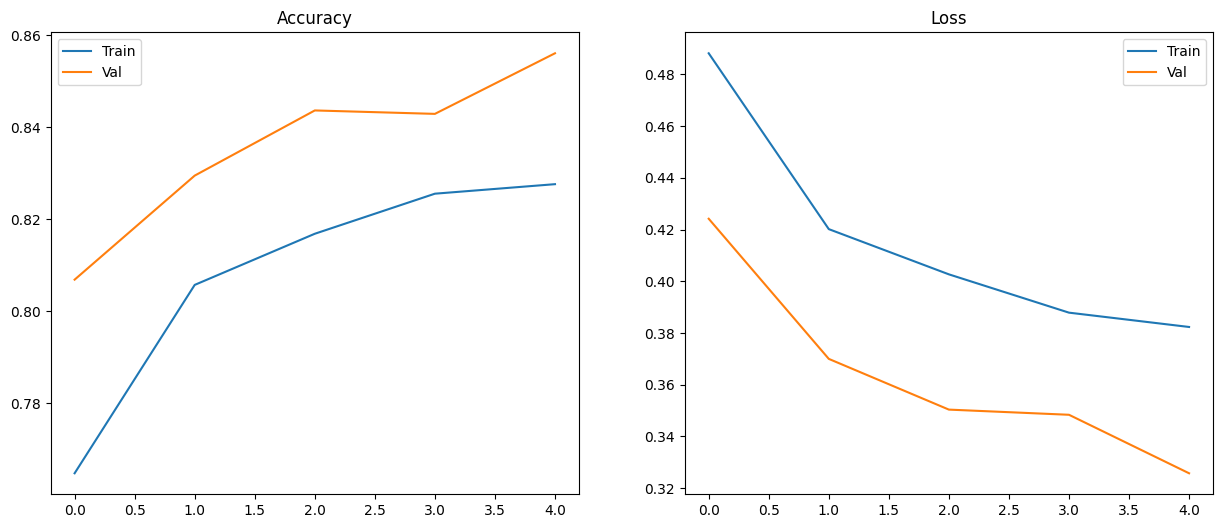

In [ ]:
# plot the performance curve
epochs = history.epoch
plt.figure(figsize=(15, 6))

# Accuracy
plt.subplot(1,2, 1)
plt.plot(epochs, history.history['accuracy'], label="Train")
plt.plot(epochs, history.history['val_accuracy'], label = "Val")
plt.legend()
plt.title("Accuracy")

# loss
plt.subplot(1,2, 2)
plt.plot(epochs, history.history['loss'], label="Train")
plt.plot(epochs, history.history['val_loss'], label = "Val")
plt.legend()
plt.title("Loss")

plt.show()

# Model Construction LSTMs:

In [ ]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, LSTM, Dropout,Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
x_train_list = x_train.to_list()
x_test_list = x_test.to_list()
max_words=5000
tk = Tokenizer(num_words=max_words,oov_token="##oov##")
tk.fit_on_texts(x_train_list)

x_train_seq = tk.texts_to_sequences(x_train_list)
x_test_seq = tk.texts_to_sequences(x_test_list)

In [ ]:
import pickle

# Assuming tk is your Tokenizer object
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tk, f)

In [ ]:
len(x_train_seq)

32345

In [ ]:
vocab_size = len(tk.word_index) + 1
vocab_size

40562

In [ ]:
lst=[]
for i in range(0,len(x_train_seq)):
    a = len(x_train_seq[i])
    lst.append(a)

print("Max len of sent:",max(lst))

Max len of sent: 193


In [ ]:
#padding tokenized texts
max_len_per_sent = 193
x_train_seq = pad_sequences(x_train_seq , maxlen=max_len_per_sent ,padding="pre",truncating="pre")
x_test_seq = pad_sequences(x_test_seq , maxlen=max_len_per_sent ,padding="pre",truncating="pre")


In [ ]:
with open('x_test_padded.pkl', 'wb') as f:
    pickle.dump(x_test_seq, f)

In [ ]:
print(x_train_seq.shape)
print(x_test_seq.shape)

(32345, 193)
(8087, 193)


In [ ]:
model = Sequential()

#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_features,input_length=max_len_per_sent))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 193, 40)           1622480   
                                                                 
 dropout (Dropout)           (None, 193, 40)           0         
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1678981 (6.40 MB)
Trainable params: 1678981 (6.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
history= model.fit(x_train_seq , y_train, epochs=10 ,
          batch_size=512, validation_data=(x_test_seq , y_test))

Epoch 1/10
64/64 [==============================] - 123s 2s/step - loss: 0.4774 - accuracy: 0.7699 - val_loss: 0.5093 - val_accuracy: 0.7698
Epoch 2/10
64/64 [==============================] - 101s 2s/step - loss: 0.3719 - accuracy: 0.8390 - val_loss: 0.3136 - val_accuracy: 0.8594
Epoch 3/10
64/64 [==============================] - 97s 2s/step - loss: 0.2581 - accuracy: 0.8885 - val_loss: 0.2705 - val_accuracy: 0.8770
Epoch 4/10
64/64 [==============================] - 95s 1s/step - loss: 0.2276 - accuracy: 0.9021 - val_loss: 0.2637 - val_accuracy: 0.8781
Epoch 5/10
64/64 [==============================] - 94s 1s/step - loss: 0.2105 - accuracy: 0.9104 - val_loss: 0.2640 - val_accuracy: 0.8803
Epoch 6/10
64/64 [==============================] - 93s 1s/step - loss: 0.1977 - accuracy: 0.9164 - val_loss: 0.2691 - val_accuracy: 0.8841
Epoch 7/10
64/64 [==============================] - 95s 1s/step - loss: 0.1893 - accuracy: 0.9194 - val_loss: 0.2668 - val_accuracy: 0.8829
Epoch 8/10
64/64 [

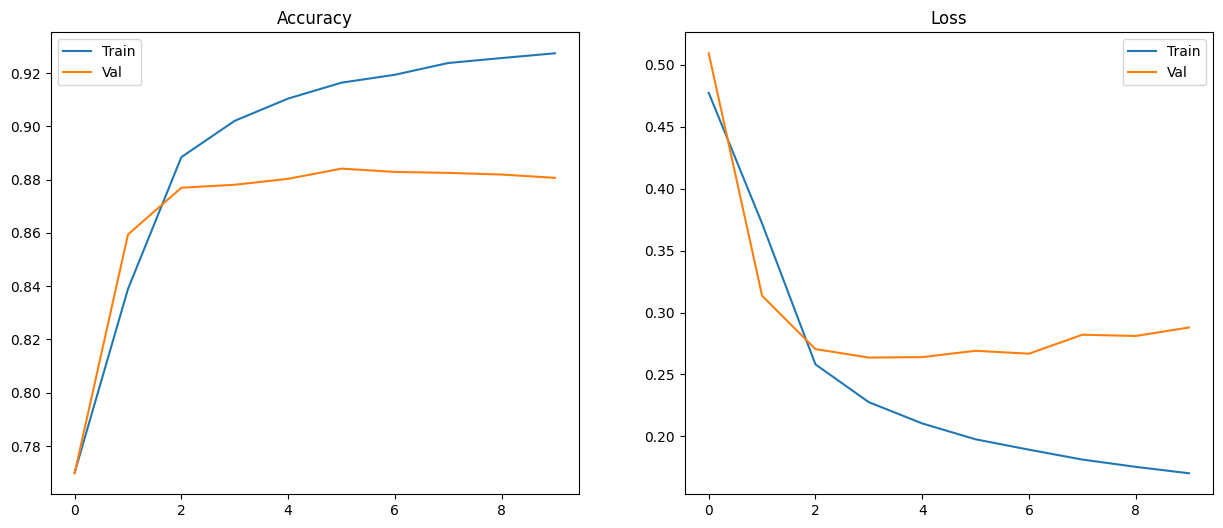

In [ ]:
# Visualize the results:

# plot the performance curve
epochs = history.epoch
plt.figure(figsize=(15, 6))

# Accuracy
plt.subplot(1,2, 1)
plt.plot(epochs, history.history['accuracy'], label="Train")
plt.plot(epochs, history.history['val_accuracy'], label = "Val")
plt.legend()
plt.title("Accuracy")

# loss
plt.subplot(1,2, 2)
plt.plot(epochs, history.history['loss'], label="Train")
plt.plot(epochs, history.history['val_loss'], label = "Val")
plt.legend()
plt.title("Loss")

plt.show()

# Evaluation:

In [ ]:
loss , acc = model.evaluate(x_test_seq, y_test)
print("Loss on test data is:",loss)
print("Accuracy on test data:",acc)

y_pred_test = model.predict(x_test_seq)
y_pred_label_test = [1 if i>=0.5 else 0 for i in y_pred_test]


253/253 [==============================] - 13s 50ms/step - loss: 0.2879 - accuracy: 0.8807
Loss on test data is: 0.28792962431907654
Accuracy on test data: 0.8806726932525635
253/253 [==============================] - 12s 44ms/step


In [ ]:
y_test[:10].values  ## Actual Labels

[0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
Categories (2, int64): [0, 1]

In [ ]:
y_pred_label_test[:10]  ## Predicted Labels

[0, 0, 0, 0, 0, 1, 1, 1, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred_label_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_label_test))

[[3555  543]
 [ 422 3567]]
0.8806726845554593


# Using bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dropout,Dense, GRU, Bidirectional, Embedding
model = Sequential()
model.add(Embedding(input_dim = vocab_size, output_dim = 500 , input_length = max_len_per_sent))
model.add(Bidirectional(LSTM(units=64 , return_sequences=False)))
model.add(Dense(units=100 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=100 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 193, 500)          20281000  
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               289280    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 100)               12900     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                      

In [50]:
history= model.fit(x_train_seq , y_train, epochs=5 ,
          batch_size=512, validation_data=(x_test_seq , y_test))

Epoch 1/5
64/64 [==============================] - 435s 7s/step - loss: 0.2491 - accuracy: 0.8914 - val_loss: 0.2670 - val_accuracy: 0.8793
Epoch 2/5
64/64 [==============================] - 419s 7s/step - loss: 0.1976 - accuracy: 0.9161 - val_loss: 0.2634 - val_accuracy: 0.8850
Epoch 3/5
64/64 [==============================] - 419s 7s/step - loss: 0.1716 - accuracy: 0.9281 - val_loss: 0.2712 - val_accuracy: 0.8851
Epoch 4/5
64/64 [==============================] - 419s 7s/step - loss: 0.1500 - accuracy: 0.9368 - val_loss: 0.3203 - val_accuracy: 0.8812
Epoch 5/5
64/64 [==============================] - 416s 6s/step - loss: 0.1362 - accuracy: 0.9432 - val_loss: 0.3407 - val_accuracy: 0.8836


In [51]:
loss , acc = model.evaluate(x_test_seq, y_test)
print("Loss on test data is:",loss)
print("Accuracy on test data:",acc)

y_pred_test = model.predict(x_test_seq)
y_pred_label_test = [1 if i>=0.5 else 0 for i in y_pred_test]

253/253 [==============================] - 87s 344ms/step - loss: 0.3407 - accuracy: 0.8836
Loss on test data is: 0.34073442220687866
Accuracy on test data: 0.8836404085159302
253/253 [==============================] - 75s 287ms/step


In [54]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred_label_test))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_label_test))

[[3673  425]
 [ 516 3473]]
0.8836404105354272


# Deployment:

In [55]:
pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

In [56]:
# Save model architecture as JSON
model_json = model.to_json()
with open("model_architecture.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights
model.save_weights("model_weights.h5")